# Customer Churn Prediction

> **Customer churn prediction is a data analytics and machine learning technique used by businesses to forecast which customers are likely to discontinue using their products or services. "Churn" refers to the situation when a customer ends their relationship with a company by canceling their subscription, discontinuing their service, or simply not making any more purchases.**

#### Follow the readme.md file attached with this for more understanding about everything

## Begin....

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir(r"D:\Ritwik's Download\ML projects")

In [3]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- **No null value**

In [6]:
# dropping the customer id
df.drop(["customerID"], axis=1, inplace=True)

In [20]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
# change the total_charges data type to float
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="coerce")

In [19]:
# null values at totalcharges
df.TotalCharges.isnull().sum()

11

In [22]:
df.shape

(7043, 20)

In [23]:
# drop those rows which has null at totalcharges
df = df.dropna(subset=['TotalCharges'])

In [24]:
df.shape

(7032, 20)

### Visualizations

In [25]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:title={'center':'total portion of male & female'}, ylabel='gender'>

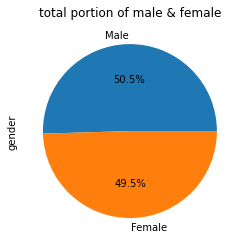

In [28]:
# gender
df.gender.value_counts().plot(kind = "pie", title = "total portion of male & female", autopct='%1.1f%%')

- **Male users are slightly more**

In [29]:
# tenure
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

- Tenure is an important column and we can check by the tenure, how the customer is/was loyal to company. 
- the tenure is provided in months

**So I can check the comparison between avarage tenure between the churn and not churn customer**

In [42]:
avg1 = np.mean(df[df.Churn == "Yes"].tenure)
avg1

17.979133226324237

In [43]:
avg2 = np.mean(df[df.Churn == "No"].tenure)
avg2

37.65000968429208

- **We can observe that the loyal customers have 2 times more avg tenure than the churn customer ones**

In [51]:
average_tenure = df.groupby('Churn')['tenure'].mean().reset_index()
average_tenure

,Churn,tenure
0,No,37.650010
1,Yes,17.979133


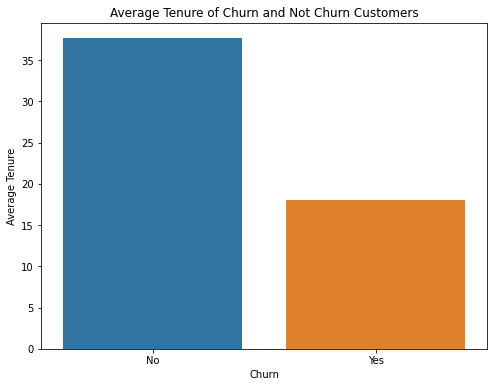

In [53]:
plt.figure(figsize=(8, 6))
sns.barplot(data=average_tenure, x='Churn', y='tenure')
plt.title('Average Tenure of Churn and Not Churn Customers')
plt.xlabel('Churn')
plt.ylabel('Average Tenure')
plt.show()

**The tenure wise customer loyality**

In [62]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [63]:
yes = df[df.Churn == "Yes"].tenure
no = df[df.Churn == "No"].tenure

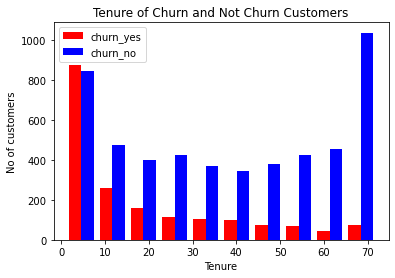

In [73]:
plt.hist([yes, no], color=["red", "blue"], label = ["churn_yes", "churn_no"])
plt.title('Tenure of Churn and Not Churn Customers')
plt.xlabel('Tenure')
plt.ylabel('No of customers')
plt.legend()

- **from this graph it is easily said the customer which is with the company for a long period of time is more loyal and not churned** 

## Data Cleaning for Model

In [75]:
# checking for object columns with unique values
def unique_values(df):
    for col in df:
        if df[col].dtype == "object":
            print("{} : {}".format(col, df[col].unique()))

In [76]:
unique_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [77]:
df.replace("No internet service", "No", inplace = True)
df.replace("No phone service", "No", inplace = True)

In [78]:
unique_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [79]:
# replace yes, no to 1&0
df.replace({"Yes":1, "No":0}, inplace=True)

In [86]:
for col in df:
    print(col, df[col].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService [0 1]
MultipleLines [0 1]
InternetService ['DSL' 'Fiber optic' 0]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling [1 0]
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn [0 1]


In [100]:
# changing the gender column
df.gender.replace({"Male":1, "Female":0}, inplace = True)

In [102]:
# now it is the time for the column with more than two catagorical values
df2 = pd.get_dummies(data = df, columns=["Contract", "InternetService", "PaymentMethod"])

In [103]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

### Data Scaling

In [104]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      uint8
Contract_One year                            uint8
Contract_Two year              

- **Now we can see all the columns are numerical column**
- **But for model building we need to scale the values, otherwise we may get some inaccurate model**
- **So we need to scale the 'tenure', 'monthlycharges' and 'totalcharges'**

In [107]:
df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_0,InternetService_DSL,InternetService_Fiber optic,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4714,0,0,1,1,65,1,1,1,1,1,...,0,0,1,0,1,0,0,0,0,1
5623,1,0,0,0,40,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [110]:
# we need the scaling of 0 to 1 as many columns consist of 0-1 values
# so I used Min-Max Scaler

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

df2.tenure = scale.fit_transform(df2[["tenure"]])
df2.MonthlyCharges = scale.fit_transform(df2[["MonthlyCharges"]])
df2.TotalCharges = scale.fit_transform(df2[["TotalCharges"]])

In [112]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_0,InternetService_DSL,InternetService_Fiber optic,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3364,0,0,1,0,0.281690,1,1,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3850,1,0,1,0,0.704225,1,0,1,1,1,...,0,0,1,0,1,0,0,1,0,0
5760,1,1,1,0,0.211268,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0


## Model Development

In [113]:
X = df2.drop(["Churn"], axis=1)
y = df["Churn"]

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

### The NN part

In [115]:
import tensorflow as tf
import tensorflow.keras as kr

In [118]:
model = kr.Sequential([
    # input layer(need same no of input as no of column)
    kr.layers.Dense(20, input_shape=(26,), activation = "relu"),
    kr.layers.Dense(15, activation = "relu"),
    # output layer(want the answer as 1 and 0)
    kr.layers.Dense(1, activation = "sigmoid")
])

In [120]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.4148 - accuracy: 0.8080
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4136 - accuracy: 0.8037
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4133 - accuracy: 0.8062
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4125 - accuracy: 0.8062
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4114 - accuracy: 0.8094
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4106 - accuracy: 0.8060
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4110 - accuracy: 0.8082
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4099 - accuracy: 0.8071
Epoch 9/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4095 - accuracy: 0.8076
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4091 - accura

176/176 [==============================] - 1s 7ms/step - loss: 0.3762 - accuracy: 0.8240
Epoch 82/100
176/176 [==============================] - 1s 7ms/step - loss: 0.3759 - accuracy: 0.8220
Epoch 83/100
176/176 [==============================] - 1s 7ms/step - loss: 0.3758 - accuracy: 0.8224
Epoch 84/100
176/176 [==============================] - 1s 8ms/step - loss: 0.3757 - accuracy: 0.8238
Epoch 85/100
176/176 [==============================] - 2s 9ms/step - loss: 0.3743 - accuracy: 0.8226
Epoch 86/100
176/176 [==============================] - 1s 8ms/step - loss: 0.3756 - accuracy: 0.8222
Epoch 87/100
176/176 [==============================] - 2s 9ms/step - loss: 0.3737 - accuracy: 0.8249
Epoch 88/100
176/176 [==============================] - 1s 8ms/step - loss: 0.3750 - accuracy: 0.8242
Epoch 89/100
176/176 [==============================] - 1s 7ms/step - loss: 0.3739 - accuracy: 0.8263
Epoch 90/100
176/176 [==============================] - 1s 7ms/step - loss: 0.3743 - accuracy: 

In [121]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.7868


[0.4408416152000427, 0.7867803573608398]

- **The accuracy of y_test is little bit low**

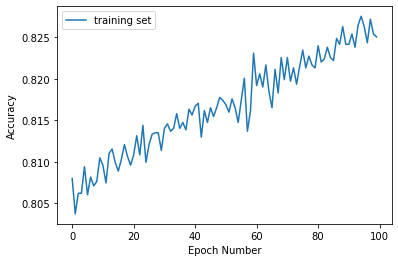

In [122]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.legend()

In [124]:
yp = model.predict(X_test)
yp[:10]

44/44 [==============================] - 0s 2ms/step


array([[0.6818644 ],
       [0.01136829],
       [0.02589495],
       [0.6888062 ],
       [0.22581571],
       [0.07842354],
       [0.25515902],
       [0.7506623 ],
       [0.1840777 ],
       [0.32249987]], dtype=float32)

In [125]:
# as we used sigmoid function for output by defination we can say
# which is more than 0.5 is 1 and other are 0

ypred = []
for i in yp:
    if i>0.5:
        ypred.append(1)
        
    else:
        ypred.append(0)

In [127]:
ypred[:5]

[1, 0, 0, 1, 0]

### Confusion matrix

In [129]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1018
           1       0.67      0.45      0.54       389

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



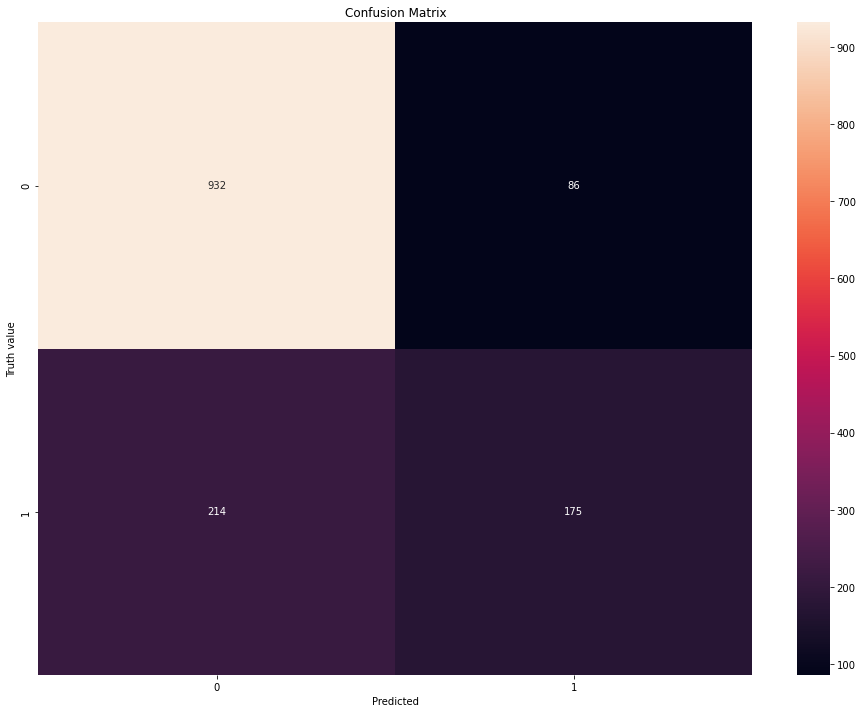

In [130]:
# confusion matrix

cm = tf.math.confusion_matrix(y_test, ypred)
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth value")
plt.show()

# Thank You